In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import pickle

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

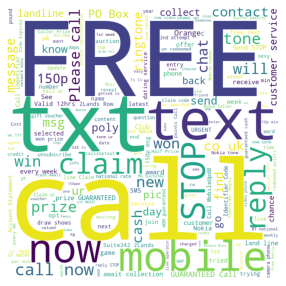

In [6]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10).generate(''.join(df[df["Category"]=="spam"]["Message"]))
  
plt.figure(figsize = (5,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

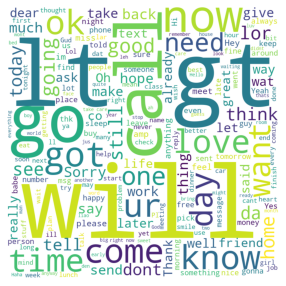

In [7]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10).generate(''.join(df[df["Category"]=="not spam"]["Message"]))
  
plt.figure(figsize = (5,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [8]:
punc = list(punctuation)

stop_words = nltk.corpus.stopwords.words('english')

stop_words_punc = stop_words + punc

In [9]:
def preprocess_document(text):
     
    # lower the string and strip spaces    
    text = text.lower()
    text = text.strip()
    
    
    # tokenize the words in document
    word_tokens = nltk.WordPunctTokenizer().tokenize(text)
    
    # remove stopwords, punctuations
    # select tokens with only alphabets
    filtered_tokens = [token for token in word_tokens if token not in stop_words_punc]
    
    # join document from the tokens
    text = ' '.join(filtered_tokens)
    
    return text

In [10]:
df = df.rename(columns={"Message":"X","Category":"y"})

In [11]:
df.head()

,y,X
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df["X"] = df["X"].apply(preprocess_document)

In [13]:
df.head()

,y,X
0,not spam,go jurong point crazy .. available bugis n gre...
1,not spam,ok lar ... joking wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,not spam,u dun say early hor ... u c already say ...
4,not spam,nah think goes usf lives around though


In [14]:
X_train,X_test,y_train,y_test = train_test_split(df["X"],df["y"],test_size=0.3,random_state=1)

In [15]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [16]:
dt = DecisionTreeClassifier()

In [17]:
dt.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = dt.predict(X_test_tfidf)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    not spam       0.96      0.99      0.98      1442
        spam       0.90      0.77      0.83       230

    accuracy                           0.96      1672
   macro avg       0.93      0.88      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [20]:
# save model

In [21]:
model_pkl = open("app/model.pkl","wb")
tfidf_pkl = open("app/tfidf.pkl","wb")

In [22]:
pickle.dump(dt,model_pkl)
pickle.dump(tfidf,tfidf_pkl)

In [23]:
model_pkl.close()
tfidf_pkl.close()